# Analyzing Beacon Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import urllib
import os

In [2]:
dir_path = 'ftp://data.munroelab.ca/pub/iceberg/beacon/'
dir_contents = urllib.request.urlopen(dir_path).read().splitlines()
filenames = [str(listing.split()[-1])[2:-1] for listing in dir_contents]
csv_filenames = [filename for filename in filenames if filename.startswith('0')
                and filename.endswith('csv')]
kml_filenames = [filename for filename in filenames if filename.startswith('0')
                and filename.endswith('kml')]
metadata_filename = filenames[-1]

In [3]:
beacon_metadata = pd.read_csv(dir_path + metadata_filename)

In [4]:
beacon_metadata

BeaconID             IMEI  ArgosID  WMO  \
0    204980  300000000000000      NaN  NaN   
1    505190  300000000000000      NaN  NaN   
2    906790  300000000000000      NaN  NaN   
3    907780  300000000000000      NaN  NaN   

                                           DataOwner  DataSharingRestrictions  \
0  Water and Ice Research Laboratory, Carleton Un...                        1   
1  Water and Ice Research Laboratory, Carleton Un...                        1   
2  Water and Ice Research Laboratory, Carleton Un...                        1   
3  Water and Ice Research Laboratory, Carleton Un...                        1   

         Contact BeaconType Manufacturer Transmitter  \
0  Derek Mueller    FT-2000       Solara     Iridium   
1  Derek Mueller    FT-2000       Solara     Iridium   
2  Derek Mueller    FT-2000       Solara     Iridium   
3  Derek Mueller    FT-2000       Solara     Iridium   

                         ...                          \
0                        ...                           
1                        ...                           
2                        ...                           
3                        ...                           

             RelatedBeaconIDs  \
0    906790, 2790480, 2792490   
1             907780, 2791420   
2  204980, 2790480,  2792490    
3             505190, 2791420   

                                  AdditionalDatasets  \
0  sail/keel mapping with laser and multibeam, CT...   
1                     photogrammetry, laser scanning   
2  sail/keel mapping with laser and multibeam, CT...   
3                     photogrammetry, laser scanning   

                                  Project Photos_Y_N NumberPhotos  \
0  Statoil/ArcticNet Research Cruise 2015          Y            7   
1  Statoil/ArcticNet Research Cruise 2015          Y           10   
2  Statoil/ArcticNet Research Cruise 2015          Y   See 204980   
3  Statoil/ArcticNet Research Cruise 2015          Y   See 505190   

                   PhotoCredits  PhotoRestrictions  PhotoComments  \
0  Derek Mueller, Anna Crawford                  4            NaN   
1  Derek Mueller, Anna Crawford                  4            NaN   
2                    See 204980                  4            NaN   
3                    See 505190                  4            NaN   

                                          PhotoNames  \
0  204980_2015_approaching the saddle berg 1.JPG,...   
1  505190_2015_Approaching tabular berg.JPG, 5051...   
2                                         see 204980   
3                                         see 505190   

                                            Comments  
0  Beacon deployed during ArcticNet/Statoil/WIRL ...  
1  Beacon deployed during ArcticNet/Statoil/WIRL ...  
2  Beacon deployed during ArcticNet/Statoil/WIRL ...  
3  Beacon deployed during ArcticNet/Statoil/WIRL ...  

[4 rows x 62 columns]

In [5]:
def get_df(data_dir_path, data_fname):
    
    df = pd.read_csv(data_dir_path + data_fname)
    df.loc[:, 'DataDate_UTC'] = pd.to_datetime(df['DataDate_UTC'])
    
    return df

In [6]:
df = get_df(dir_path, csv_filenames[1])

In [7]:
df.head()

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
0     50519     Solara 2015-04-23 18:48:37                   NaN  49.22403   
1     50519     Solara 2015-04-23 18:49:07                   NaN  49.22401   
2     50519     Solara 2015-04-23 18:49:34                   NaN  49.22400   
3     50519     Solara 2015-04-23 18:49:59                   NaN  49.22403   
4     50519     Solara 2015-04-23 18:50:26                   NaN  49.22399   

   Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
0  -51.25820    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1  -51.25817    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
2  -51.25809    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
3  -51.25789    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
4  -51.25789    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   

   Satellites  GPSdelay  SNR  TTFF  
0         NaN       NaN  NaN   NaN  
1         NaN       NaN  NaN   NaN  
2         NaN       NaN  NaN   NaN  
3         NaN       NaN  NaN   NaN  
4         NaN       NaN  NaN   NaN

In [8]:
def get_day_idxs(dft, day_inc = 5):

    day_idxs = []
    day_js = []
    day_j = 0
    
    for i in range(len(df)):
        day = (dft[i] - dft[0]).days
        if day == day_j:
            day_idxs.append(i)
            day_js.append(day_j)
            day_j += day_inc
    
    return day_idxs, day_js

In [9]:
def plot_drift_track(df, data_fname):
    
    fig = plt.figure()

    x, y = df['Longitude'], df['Latitude']
    
    plt.scatter(x, y, s=2)
    
    t = df['DataDate_UTC']
    day_idxs, day_js = get_day_idxs(t)
    
    for i, day_idx in enumerate(day_idxs):
    
        plt.text(x[day_idx], y[day_idx], str(day_js[i]), fontsize=16, )
    
    plt.title(f'Drift Track from {data_fname}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    return fig

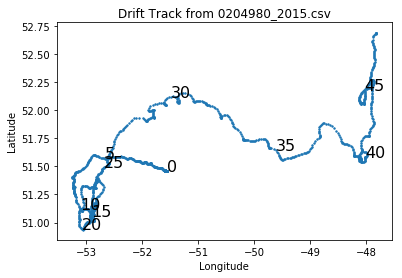

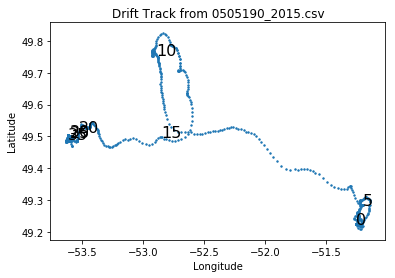

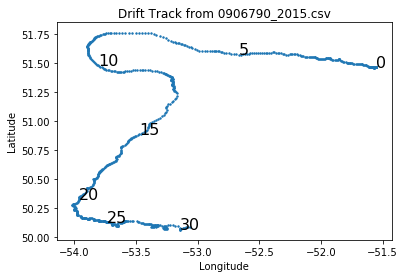

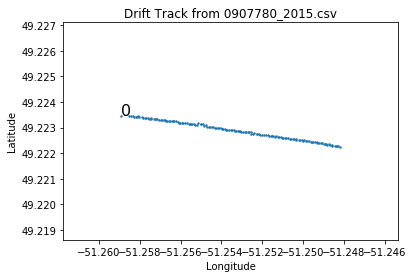

In [10]:
try:
    os.makedirs('plots')
except:
    pass

with PdfPages('plots/beacon_tracks.pdf') as pdf:
    for filename in csv_filenames:
        df = get_df(dir_path, filename)
        fig = plot_drift_track(df, filename)
        plt.show()
        plt.close()
        pdf.savefig(fig)

# Animation

In [11]:
from matplotlib import animation
from IPython.display import HTML

In [15]:
df0 = get_df(dir_path, csv_filenames[0])
df1 = get_df(dir_path, csv_filenames[1])
df2 = get_df(dir_path, csv_filenames[2])
df3 = get_df(dir_path, csv_filenames[3])

In [114]:
df = pd.concat([df0, df1, df2, df3], ignore_index=False)

In [115]:
df['old_index'] = pd.Series(df.index.values)
sorted_df = df.sort_values(by='DataDate_UTC').reset_index(drop=True)

In [55]:
sorted_df.BeaconID.unique()

array([ 50519,  90778, 204980,  90679])

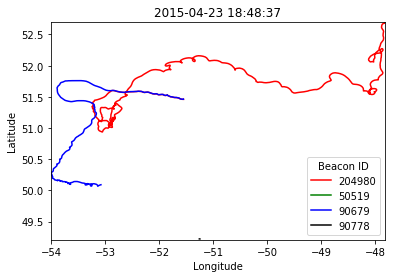

In [110]:
x0_list = df0.Longitude.values; y0_list = df0.Latitude.values; id0 = 204980
x1_list = df1.Longitude.values; y1_list = df1.Latitude.values; id1 = 50519
x2_list = df2.Longitude.values; y2_list = df2.Latitude.values; id2 = 90679
x3_list = df3.Longitude.values; y3_list = df3.Latitude.values; id3 = 90778

t_list = sorted_df.DataDate_UTC.values
x_list = sorted_df.Longitude.values
y_list = sorted_df.Latitude.values
id_list = sorted_df.BeaconID.values

fig, ax = plt.subplots()
ax.axis([min(x_list), max(x_list), min(y_list), max(y_list)])
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('')

l0, = ax.plot([],[], color='red', label=str(id0))
l1, = ax.plot([],[], color='green', label=str(id1))
l2, = ax.plot([],[], color='blue', label=str(id2))
l3, = ax.plot([],[], color='black', label=str(id3))

ax.legend(loc='lower right', title='Beacon ID')

def animate(i):
    j = sorted_df.old_index[i]
    if id_list[i] == id0:
        l0.set_data(x0_list[:j], y0_list[:j])
    elif id_list[i] == id1:
        l1.set_data(x1_list[:j], y1_list[:j])
    elif id_list[i] == id2:
        l2.set_data(x2_list[:j], y2_list[:j])
    elif id_list[i] == id3:
        l3.set_data(x3_list[:j], y3_list[:j])
    else:
        pass
    ax.set_title(pd.Timestamp(t_list[i]))

anim = animation.FuncAnimation(fig, animate, frames=len(t_list), interval=20)#len(t_list))

HTML(anim.to_html5_video())

# Simulations

In [11]:
from icedef.constants import *
from icedef.iceberg import quickstart, dx_to_dlon, dy_to_dlat, dlon_to_dx, dlat_to_dy
from icedef import metocean
from icedef import drift

In [12]:
csv_filenames

['0204980_2015.csv',
 '0505190_2015.csv',
 '0906790_2015.csv',
 '0907780_2015.csv']

In [13]:
df = get_df(dir_path, csv_filenames[2])

df.head()

BeaconID BeaconType        DataDate_UTC  TransmissionDate_UTC  Latitude  \
0     90679     Solara 2015-04-24 15:21:03                   NaN  51.46240   
1     90679     Solara 2015-04-24 15:21:29                   NaN  51.46174   
2     90679     Solara 2015-04-24 15:21:57                   NaN  51.46176   
3     90679     Solara 2015-04-24 15:22:23                   NaN  51.46177   
4     90679     Solara 2015-04-24 15:22:55                   NaN  51.46175   

   Longitude  VBatt  AT  ST  BP  Heading  Speed  LocAccuracy  MessageIndex  \
0  -51.55285    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
1  -51.55156    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
2  -51.55161    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
3  -51.55165    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   
4  -51.55176    NaN NaN NaN NaN      NaN    NaN          NaN           NaN   

   Satellites  GPSdelay  SNR  TTFF  
0         NaN       NaN  NaN   NaN  
1         NaN       NaN  NaN   NaN  
2         NaN       NaN  NaN   NaN  
3         NaN       NaN  NaN   NaN  
4         NaN       NaN  NaN   NaN

In [14]:
start_index = 1000
end_index = 1200

iceberg_time = np.datetime64(df.DataDate_UTC[start_index])
iceberg_latitude = df.Latitude[start_index]
iceberg_longitude = df.Longitude[start_index]
iceberg = quickstart(iceberg_time, (iceberg_latitude, iceberg_longitude))

In [15]:
start_time = iceberg_time
end_time = np.datetime64(df.DataDate_UTC[end_index])
start_latitude = iceberg_latitude
start_longitude = iceberg_longitude

In [16]:
ocean = metocean.ECMWFOcean((start_time, end_time))
atm = metocean.NARRAtmosphere((start_time, end_time))

In [17]:
tdelta = np.timedelta64(360, 's')
dt = tdelta / np.timedelta64(1, 's')
nt = int((end_time - start_time) / tdelta)

In [18]:
iceberg = quickstart(start_time, (start_latitude, start_longitude))

iceberg_constants = {
    'form_drag_coefficient_in_air': iceberg.FORM_DRAG_COEFFICIENT_IN_AIR,
    'form_drag_coefficient_in_water': iceberg.FORM_DRAG_COEFFICIENT_IN_WATER,
    'skin_drag_coefficient_in_air': iceberg.SKIN_DRAG_COEFFICIENT_IN_AIR,
    'skin_drag_coefficient_in_water': iceberg.SKIN_DRAG_COEFFICIENT_IN_WATER,
    'sail_area': iceberg.geometry.sail_area,
    'keel_area': iceberg.geometry.keel_area,
    'top_area': iceberg.geometry.waterline_length**2,
    'bottom_area': 0,
    'mass': iceberg.geometry.mass,
    'latitude': iceberg.latitude
}

point = (iceberg.time, iceberg.latitude, iceberg.longitude)

current_velocity = (metocean.interpolate(point, ocean.eastward_current_velocities),
                    metocean.interpolate(point, ocean.northward_current_velocities))

wind_velocity = (metocean.interpolate(point, atm.eastward_wind_velocities),
                 metocean.interpolate(point, atm.northward_wind_velocities))

curr_vel_history = []
wind_vel_history = []

for t in range(nt):
    
    ax, ay = drift.newtonian_drift((iceberg.eastward_velocity, iceberg.northward_velocity), 
                             current_velocity, wind_velocity, 
                             iceberg_constants)
    
    iceberg.time += tdelta
    iceberg.eastward_velocity += ax * dt
    iceberg.northward_velocity += ay * dt
    iceberg.latitude += dy_to_dlat(iceberg.northward_velocity * dt)
    iceberg.longitude += dx_to_dlon(iceberg.eastward_velocity * dt, iceberg.latitude)
    
    point = (iceberg.time, iceberg.latitude, iceberg.longitude)
    
    curr_vel_history.append(current_velocity)
    wind_vel_history.append(wind_velocity)
    
    current_velocity = (metocean.interpolate(point, ocean.eastward_current_velocities),
                        metocean.interpolate(point, ocean.northward_current_velocities))

    wind_velocity = (metocean.interpolate(point, atm.eastward_wind_velocities),
                     metocean.interpolate(point, atm.northward_wind_velocities))
    
    iceberg_constants['latitude'] = iceberg.latitude
    iceberg.update_history()

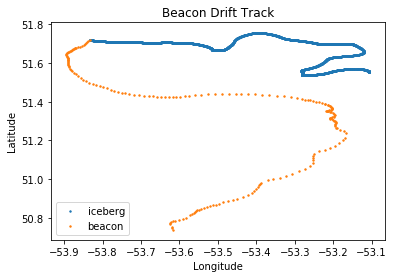

In [19]:
plt.scatter(iceberg.history['longitude'], iceberg.history['latitude'], 
            s=2, label='iceberg')
plt.scatter(df.Longitude[start_index:end_index+1], df.Latitude[start_index:end_index+1], s=2, label='beacon')
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Beacon Drift Track')
plt.show()

# Optimization

In [20]:
from scipy.optimize import minimize
from scipy.interpolate import RegularGridInterpolator as RGI
from scipy.interpolate import interp1d

In [22]:
def compute_mse(simulation_point, observation_vectors):
    
    sim_x, sim_y, sim_t = simulation_point
    obs_x_vec, obs_y_vec, obs_t_vec = observation_vectors
    
    t0 = obs_t_vec[0]
    
    sim_t = (sim_t - t0).item().total_seconds()
    obs_t_vec = [(obs_t - t0).item().total_seconds() for obs_t in obs_t_vec]
    
    obs_x_interpolant = interp1d(obs_t_vec, obs_x_vec)
    obs_y_interpolant = interp1d(obs_t_vec, obs_y_vec)
    
    obs_x = obs_x_interpolant(sim_t) 
    obs_y = obs_y_interpolant(sim_t)
    
    mse = np.sqrt((obs_x - sim_x)**2 + (obs_y - sim_y)**2)
    
    return mse

In [56]:
def drift_wrapper(form_drag_coefficients, df):

    start_index = 1000
    end_index = 1150

    iceberg_time = np.datetime64(df.DataDate_UTC[start_index])
    iceberg_latitude = df.Latitude[start_index]
    iceberg_longitude = df.Longitude[start_index]

    iceberg_eastward_velocity = dlat_to_dy(df.Latitude[start_index + 10] - df.Latitude[start_index]) / \
    (df.DataDate_UTC[start_index + 10] - df.DataDate_UTC[start_index]).total_seconds()

    iceberg_northward_velocity = dlon_to_dx(df.Longitude[start_index + 10] - df.Longitude[start_index], iceberg_latitude) / \
    (df.DataDate_UTC[start_index + 10] - df.DataDate_UTC[start_index]).total_seconds()

    iceberg_velocity = (iceberg_eastward_velocity, iceberg_northward_velocity)

    iceberg = quickstart(iceberg_time, (iceberg_latitude, iceberg_longitude), velocity = iceberg_velocity)

    start_time = iceberg_time
    end_time = np.datetime64(df.DataDate_UTC[end_index])
    start_latitude = iceberg_latitude
    start_longitude = iceberg_longitude

    ocean = metocean.ECMWFOcean((start_time, end_time))
    atm = metocean.NARRAtmosphere((start_time, end_time))

    tdelta = np.timedelta64(360, 's')
    dt = tdelta / np.timedelta64(1, 's')
    nt = int((end_time - start_time) / tdelta)

    iceberg = quickstart(start_time, (start_latitude, start_longitude), velocity = iceberg_velocity)
    
    iceberg.FORM_DRAG_COEFFICIENT_IN_AIR = form_drag_coefficients[0]
    iceberg.FORM_DRAG_COEFFICIENT_IN_WATER = form_drag_coefficients[1]

    iceberg_constants = {
        'form_drag_coefficient_in_air': iceberg.FORM_DRAG_COEFFICIENT_IN_AIR,
        'form_drag_coefficient_in_water': iceberg.FORM_DRAG_COEFFICIENT_IN_WATER,
        'skin_drag_coefficient_in_air': iceberg.SKIN_DRAG_COEFFICIENT_IN_AIR,
        'skin_drag_coefficient_in_water': iceberg.SKIN_DRAG_COEFFICIENT_IN_WATER,
        'sail_area': iceberg.geometry.sail_area,
        'keel_area': iceberg.geometry.keel_area,
        'top_area': iceberg.geometry.waterline_length**2,
        'bottom_area': 0,
        'mass': iceberg.geometry.mass,
        'latitude': iceberg.latitude
    }

    point = (iceberg.time, iceberg.latitude, iceberg.longitude)

    current_velocity = (metocean.interpolate(point, ocean.eastward_current_velocities),
                        metocean.interpolate(point, ocean.northward_current_velocities))

    wind_velocity = (metocean.interpolate(point, atm.eastward_wind_velocities),
                     metocean.interpolate(point, atm.northward_wind_velocities))


    for t in range(nt):


        ax, ay = drift.newtonian_drift((iceberg.eastward_velocity, iceberg.northward_velocity), 
                                 current_velocity, wind_velocity, 
                                 iceberg_constants)

        iceberg.time += tdelta
        iceberg.eastward_velocity += ax * dt
        iceberg.northward_velocity += ay * dt
        iceberg.latitude += dy_to_dlat(iceberg.northward_velocity * dt)
        iceberg.longitude += dx_to_dlon(iceberg.eastward_velocity * dt, iceberg.latitude)

        point = (iceberg.time, iceberg.latitude, iceberg.longitude)

        current_velocity = (metocean.interpolate(point, ocean.eastward_current_velocities),
                            metocean.interpolate(point, ocean.northward_current_velocities))

        wind_velocity = (metocean.interpolate(point, atm.eastward_wind_velocities),
                         metocean.interpolate(point, atm.northward_wind_velocities))

        iceberg_constants['latitude'] = iceberg.latitude
        iceberg.update_history()
        
    mse = compute_mse((iceberg.longitude, iceberg.latitude, iceberg.time),
           (df.Longitude[start_index:end_index+1], df.Latitude[start_index:end_index+1], 
           [np.datetime64(t) for t in df.DataDate_UTC[start_index:end_index+1]]))
    
    return mse

In [55]:
minimize(drift_wrapper, x0=(1, 1), bounds=((0, 2), (0, 2)), args=(df))

      fun: 6.071993979322123e-08
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.33320659, 10.46448716])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 297
      nit: 32
   status: 0
  success: True
        x: array([1.35767663, 0.00280693])